In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Input tao 1 mau ngau nhien pp chuan
n_size= 600
Xi = np.random.normal(loc=0.0, scale=1.0, size=n_size)
#Tao day x ngau nhien
#x = np.random.normal(loc=0.0, scale=1.0, size=n_size)
#print(Xi[:3], x[:3])

In [3]:
def chu_nhat(x):
  k = 0.5 if np.abs(x) < 1 else 0
  return k

def tam_giac(x):
  k = 1 - np.abs(x) if np.abs(x) < 1 else 0
  return k

def parabolic(x):
  k = (3/4) * (1- pow(x,2)) if np.abs(x)<1 else 0
  return k

def haitrongso(x):
  sotam = 1- pow(x,2)
  k = (15/16)* pow(sotam,2) if np.abs(x) < 1 else 0
  return k

def gauss(x):
  k = 1/(np.sqrt(2*np.pi)) * pow(np.e, -(x**2)/2)
  return k

def sine(x):
  k = 0.5* pow(np.e, -np.abs(x)/np.sqrt(2))* np.sin(np.abs(x)/np.sqrt(2) + np.pi/4)
  return k

In [4]:
print(chu_nhat(0.5))
print(tam_giac(0.5))
print(parabolic(0.5))
print(haitrongso(0.5))
print(gauss(0.5))
print(sine(0.5))

0.5
0.5
0.5625
0.52734375
0.3520653267642995
0.3188621031945971


In [5]:
def x_kernel(xi, x0, h0):
  x = (xi - x0)/h0
  return x

def f_kernel(xi, h0, kernel, n_size):
  fkernel = []
  ii = 0
  while ii < n_size:
    x0 = np.random.normal(loc=0.0, scale=1.0, size=600)
    x = x_kernel(xi[ii],x0, h0)
    lst_kernel = []
    for i in range(len(x)):
      if kernel == 1:
        k = chu_nhat(x[i])
      elif kernel == 2:
        k = tam_giac(x[i])
      elif kernel == 3:
        k = parabolic(x[i])
      elif kernel == 4:
        k = haitrongso(x[i])
      elif kernel == 5:
        k = gauss(x[i])
      elif kernel == 6:
        k = sine(x[i])
      else:
        k = 'Khong co ket qua'
      lst_kernel.append(k)
    lst_kernel = 1/(n_size* h0)*np.sum(lst_kernel)
    fkernel.append(lst_kernel)
    ii += 1
  return fkernel

In [6]:
fk1 = f_kernel(xi =Xi, h0=0.1, kernel=1, n_size=600)
fk2 = f_kernel(xi =Xi, h0=0.6, kernel=1, n_size=600)
fk3 = f_kernel(xi =Xi, h0=1, kernel=1, n_size=600)
fk4 = f_kernel(xi =Xi, h0=0.2, kernel=3, n_size=600)
fk5 = f_kernel(xi =Xi, h0=0.2, kernel=4, n_size=600)
fk6 = f_kernel(xi =Xi, h0=0.2, kernel=5, n_size=600)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box Kernel Density Function')

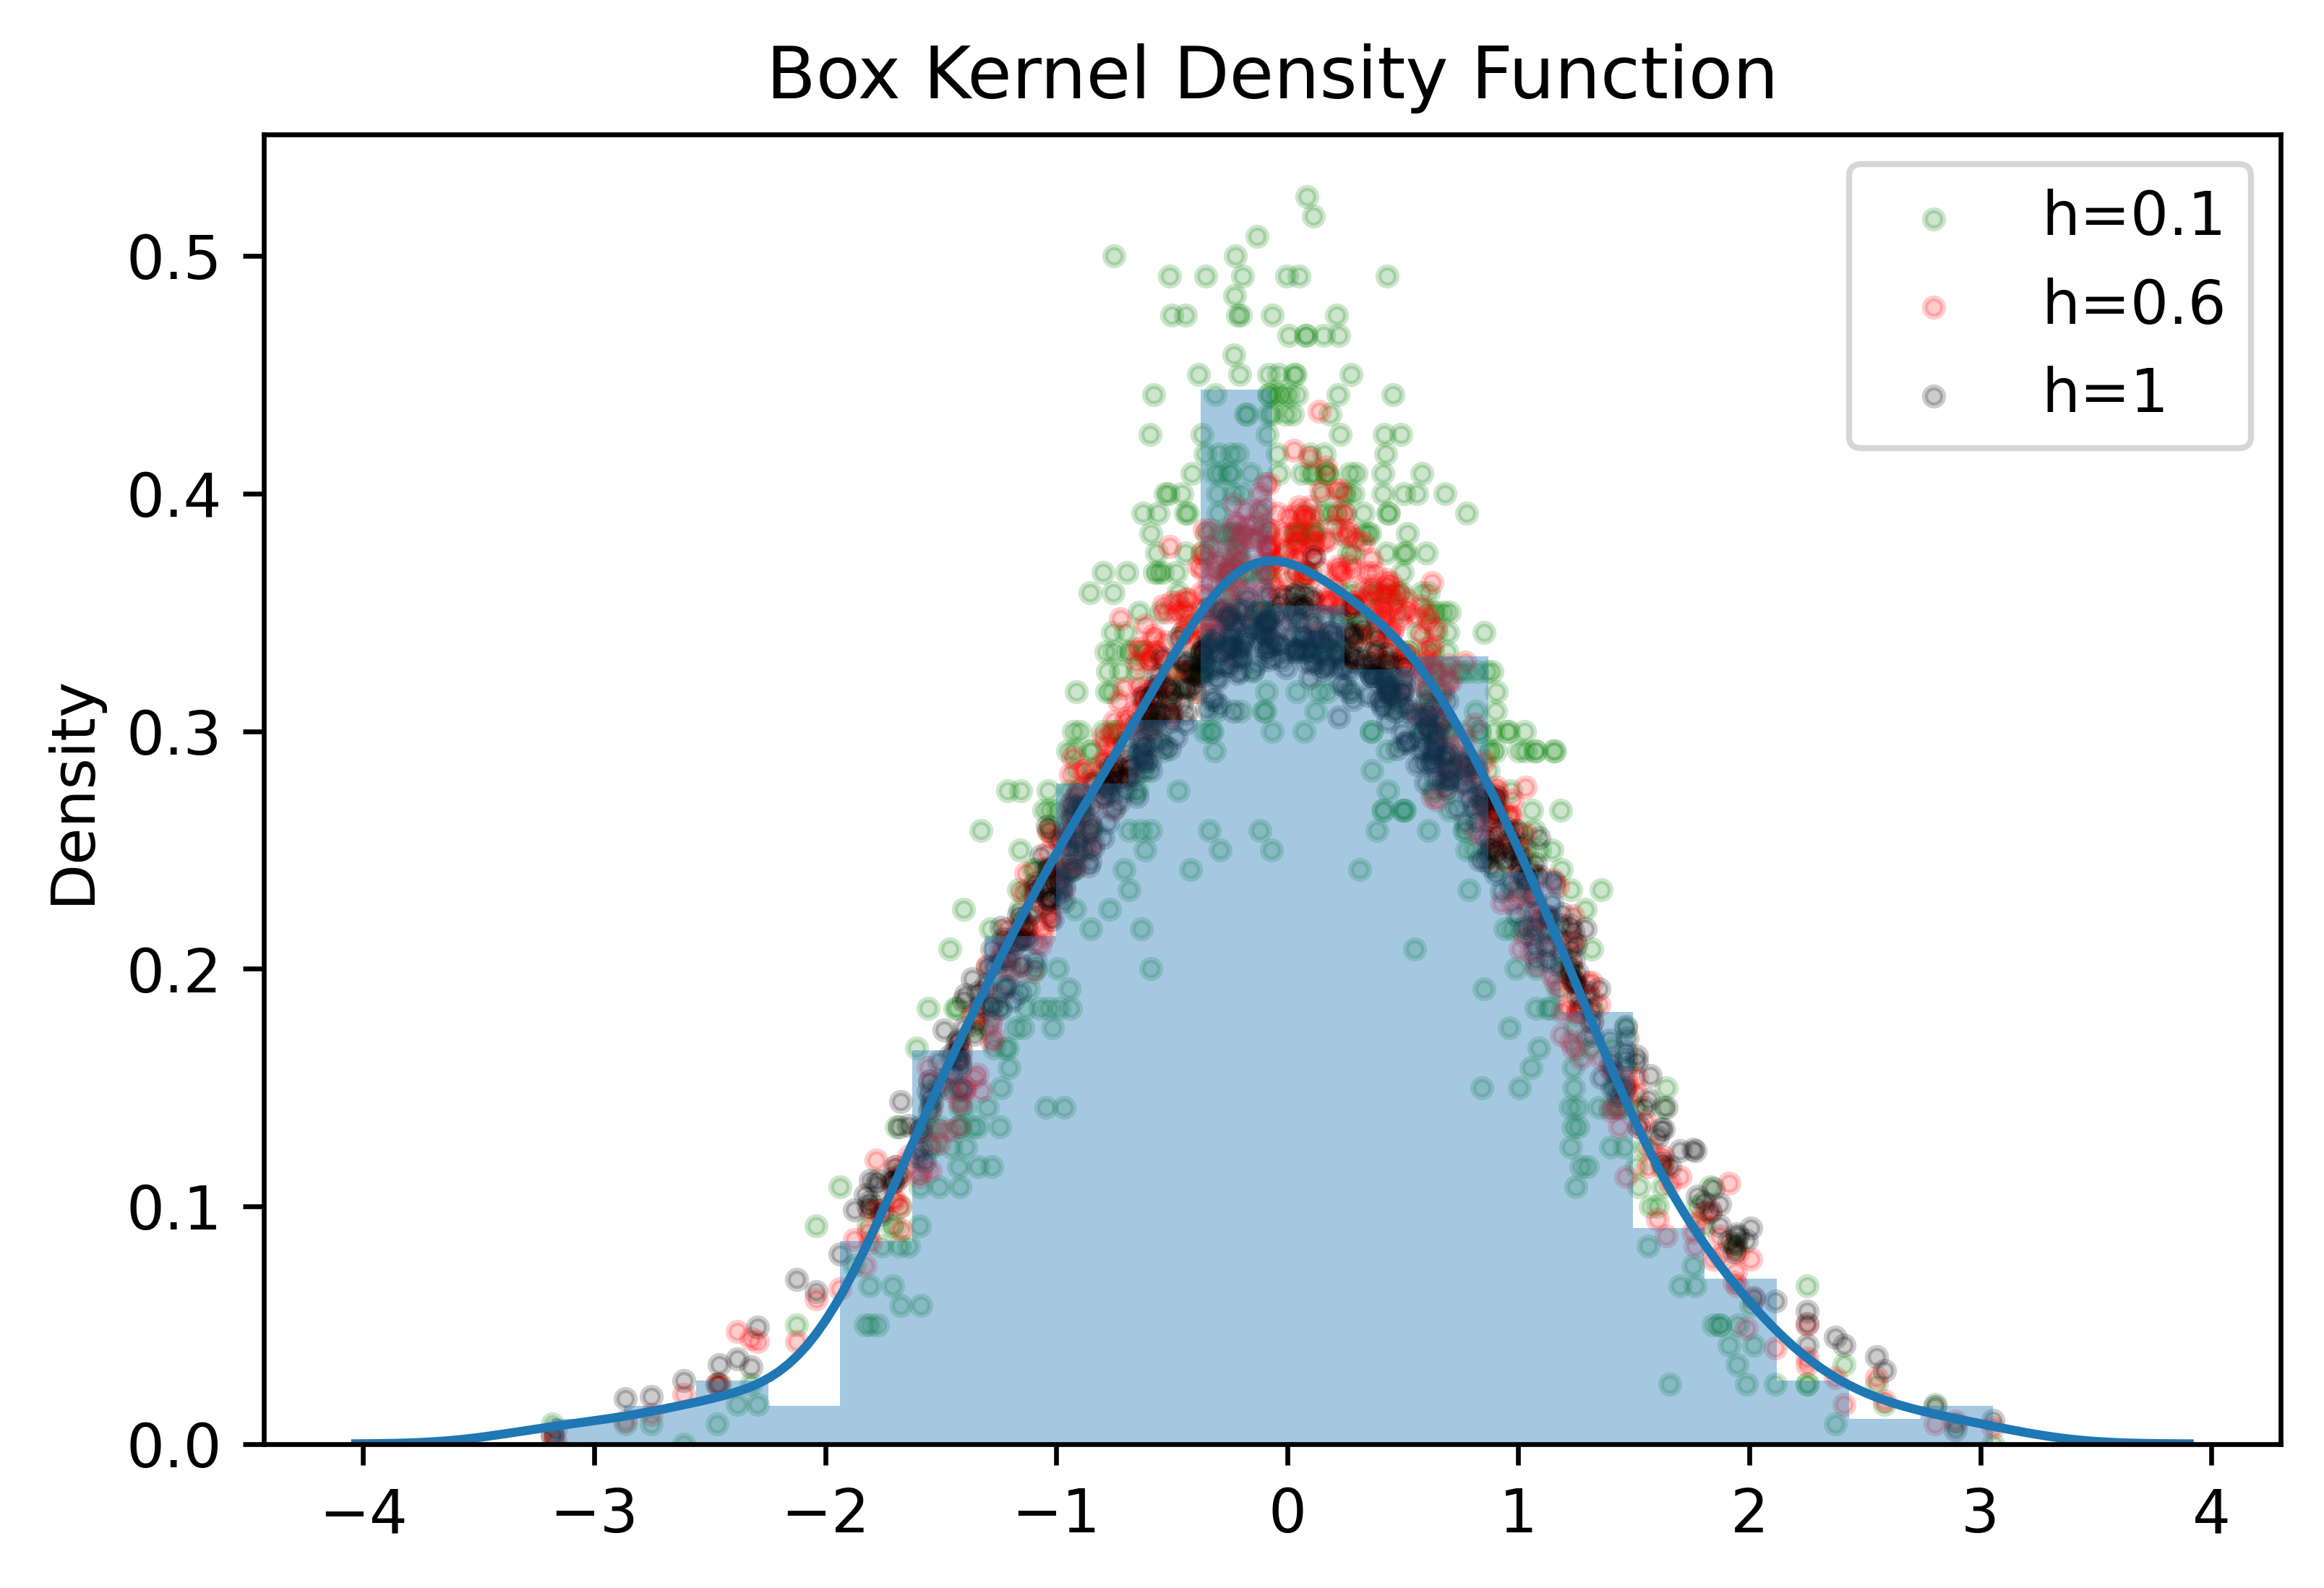

In [7]:
plt.rcParams["figure.dpi"] = 600
sns.distplot(Xi)
plt.scatter(Xi, fk1, label="h=0.1", color = 'green', alpha = 0.2, marker = '.')
plt.scatter(Xi, fk2, label="h=0.6", color = 'red', alpha = 0.2, marker = '.')
plt.scatter(Xi, fk3, label="h=1", color = 'black', alpha = 0.2, marker = '.')
plt.legend()
plt.title('Box Kernel Density Function')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box Kernel Density Function')

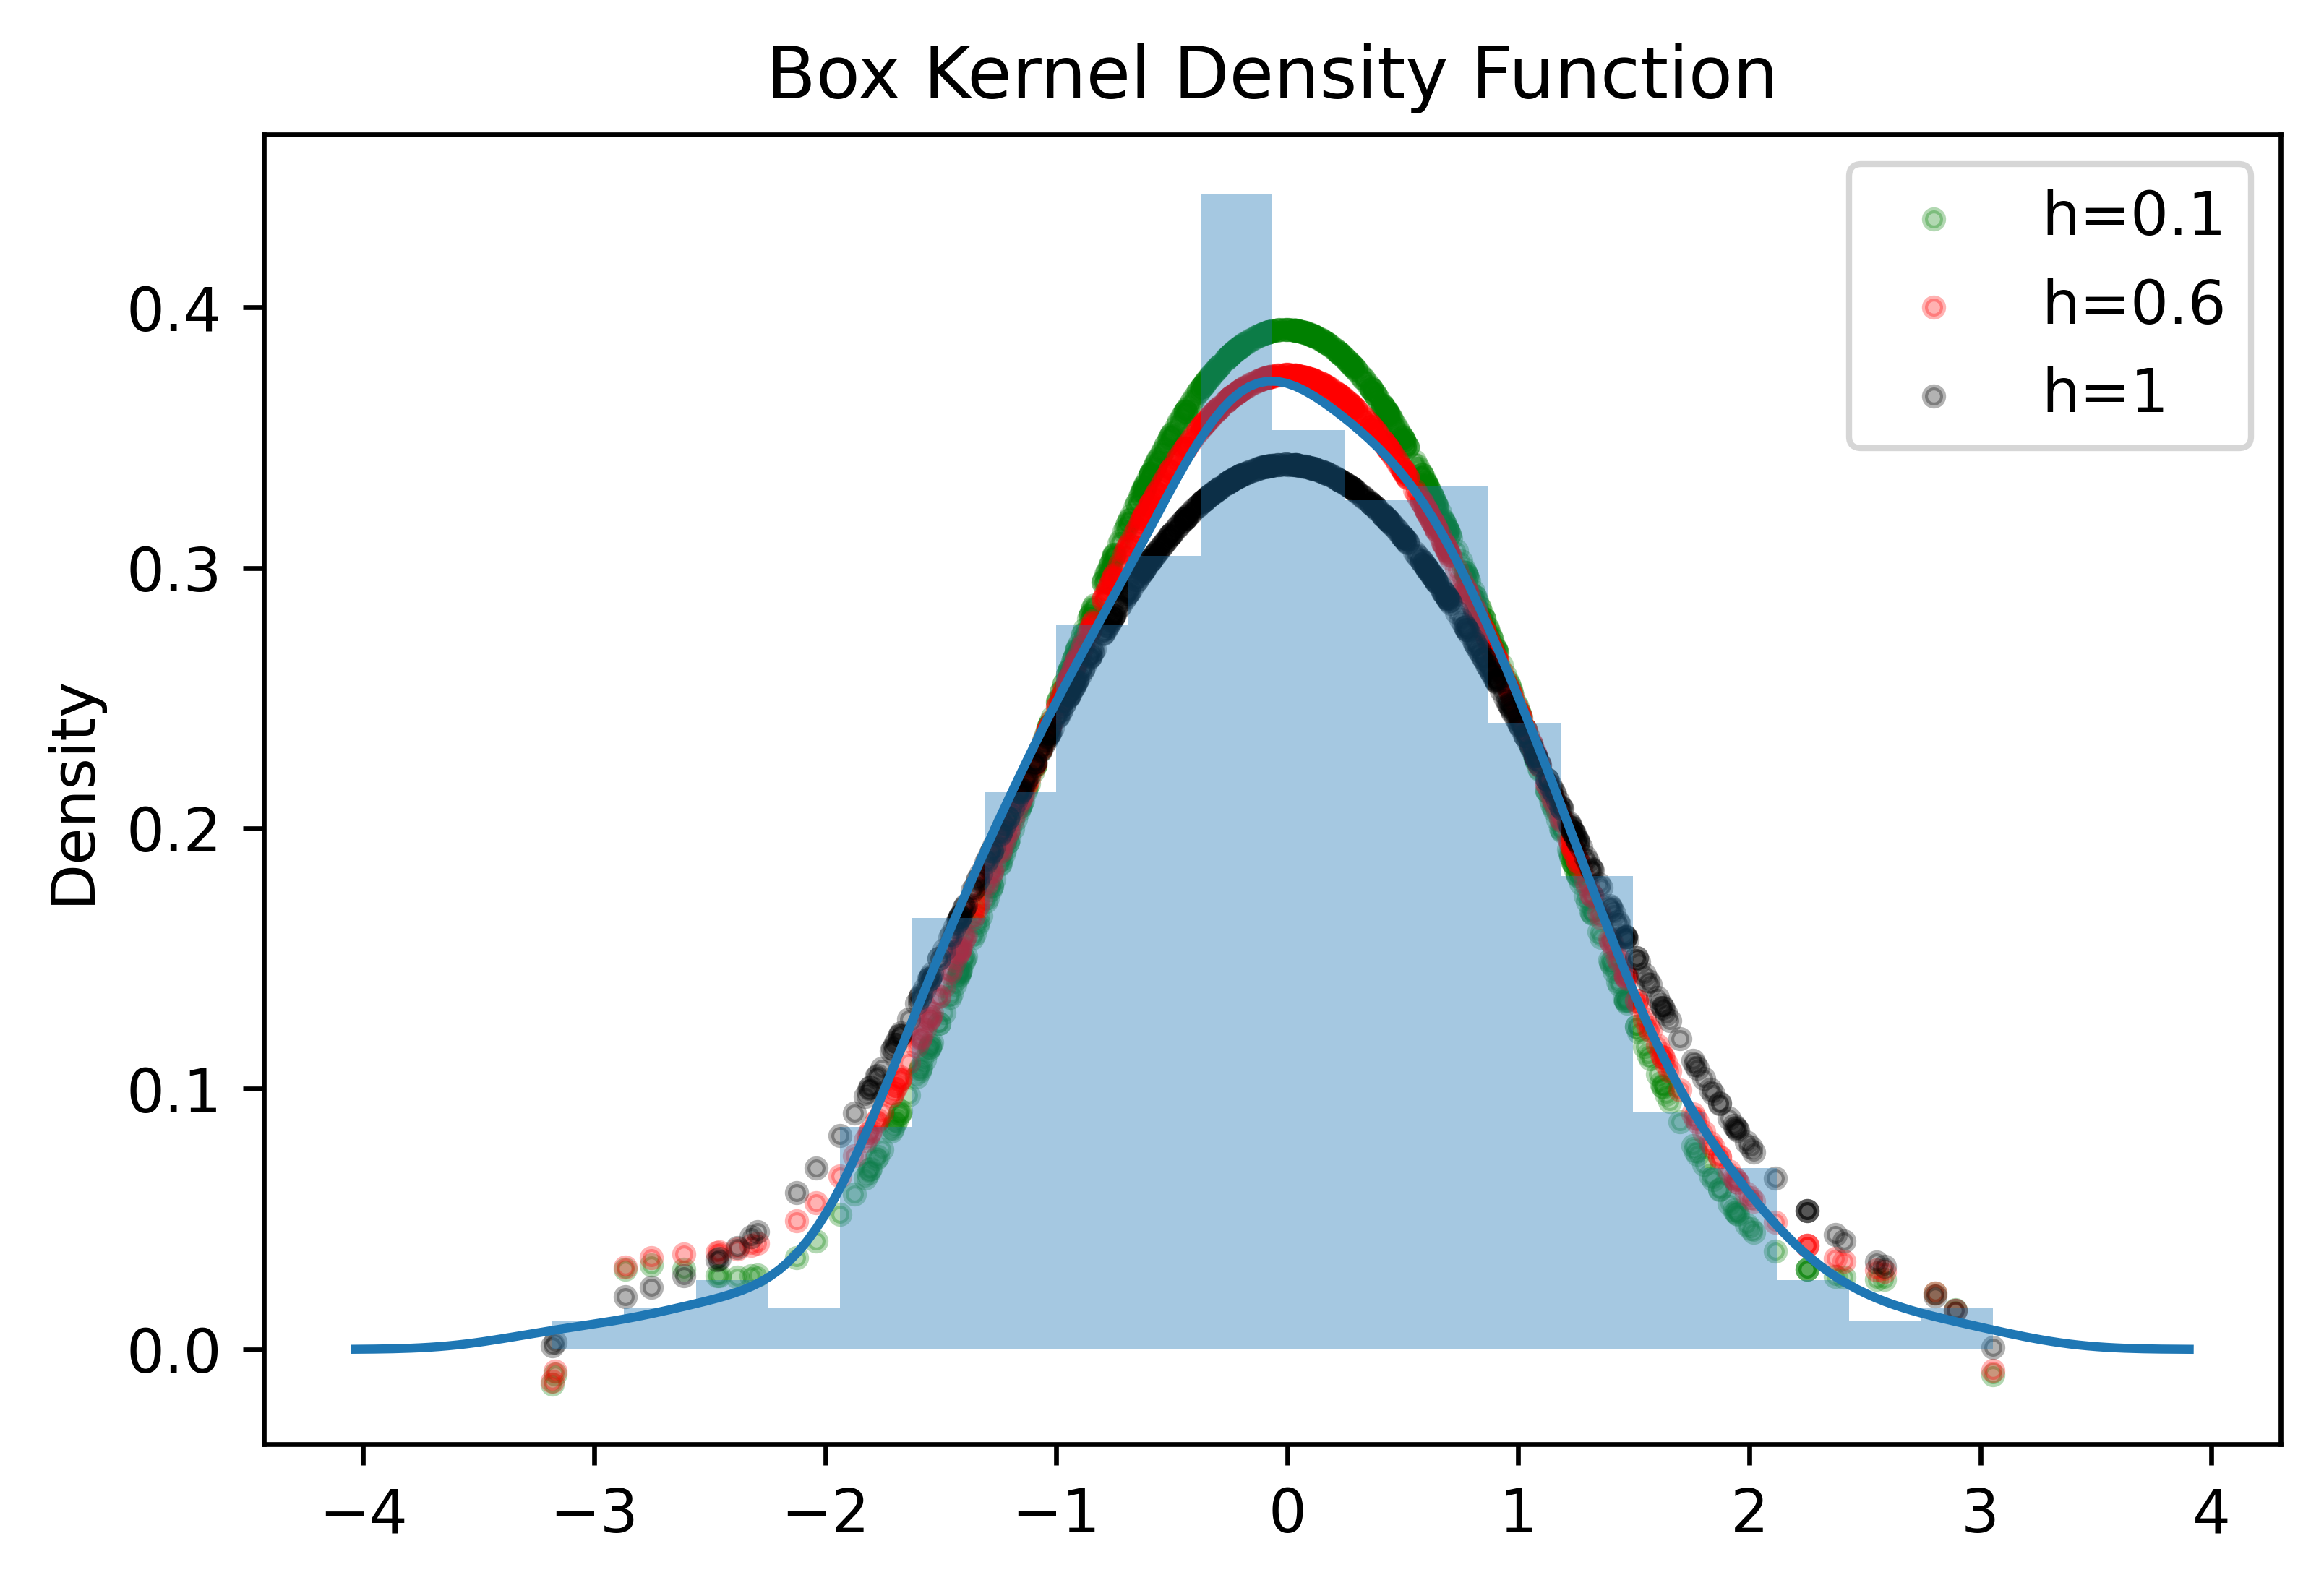

In [8]:
## Draw Curve fit the graph above to see it clearly
sns.distplot(Xi)
model1 = np.poly1d(np.polyfit(Xi, fk1, 6))
model2 = np.poly1d(np.polyfit(Xi, fk2, 6))
model3 = np.poly1d(np.polyfit(Xi, fk3, 6))
plt.scatter(Xi, model1(Xi), color='green', alpha = 0.3, label='h=0.1', marker='.')
plt.scatter(Xi, model2(Xi), color='red', alpha = 0.3, label='h=0.6', marker='.')
plt.scatter(Xi, model3(Xi), color='black', alpha = 0.3, label='h=1', marker='.')
plt.legend()
plt.title('Box Kernel Density Function')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Kernel Density Function with h = 0.2')

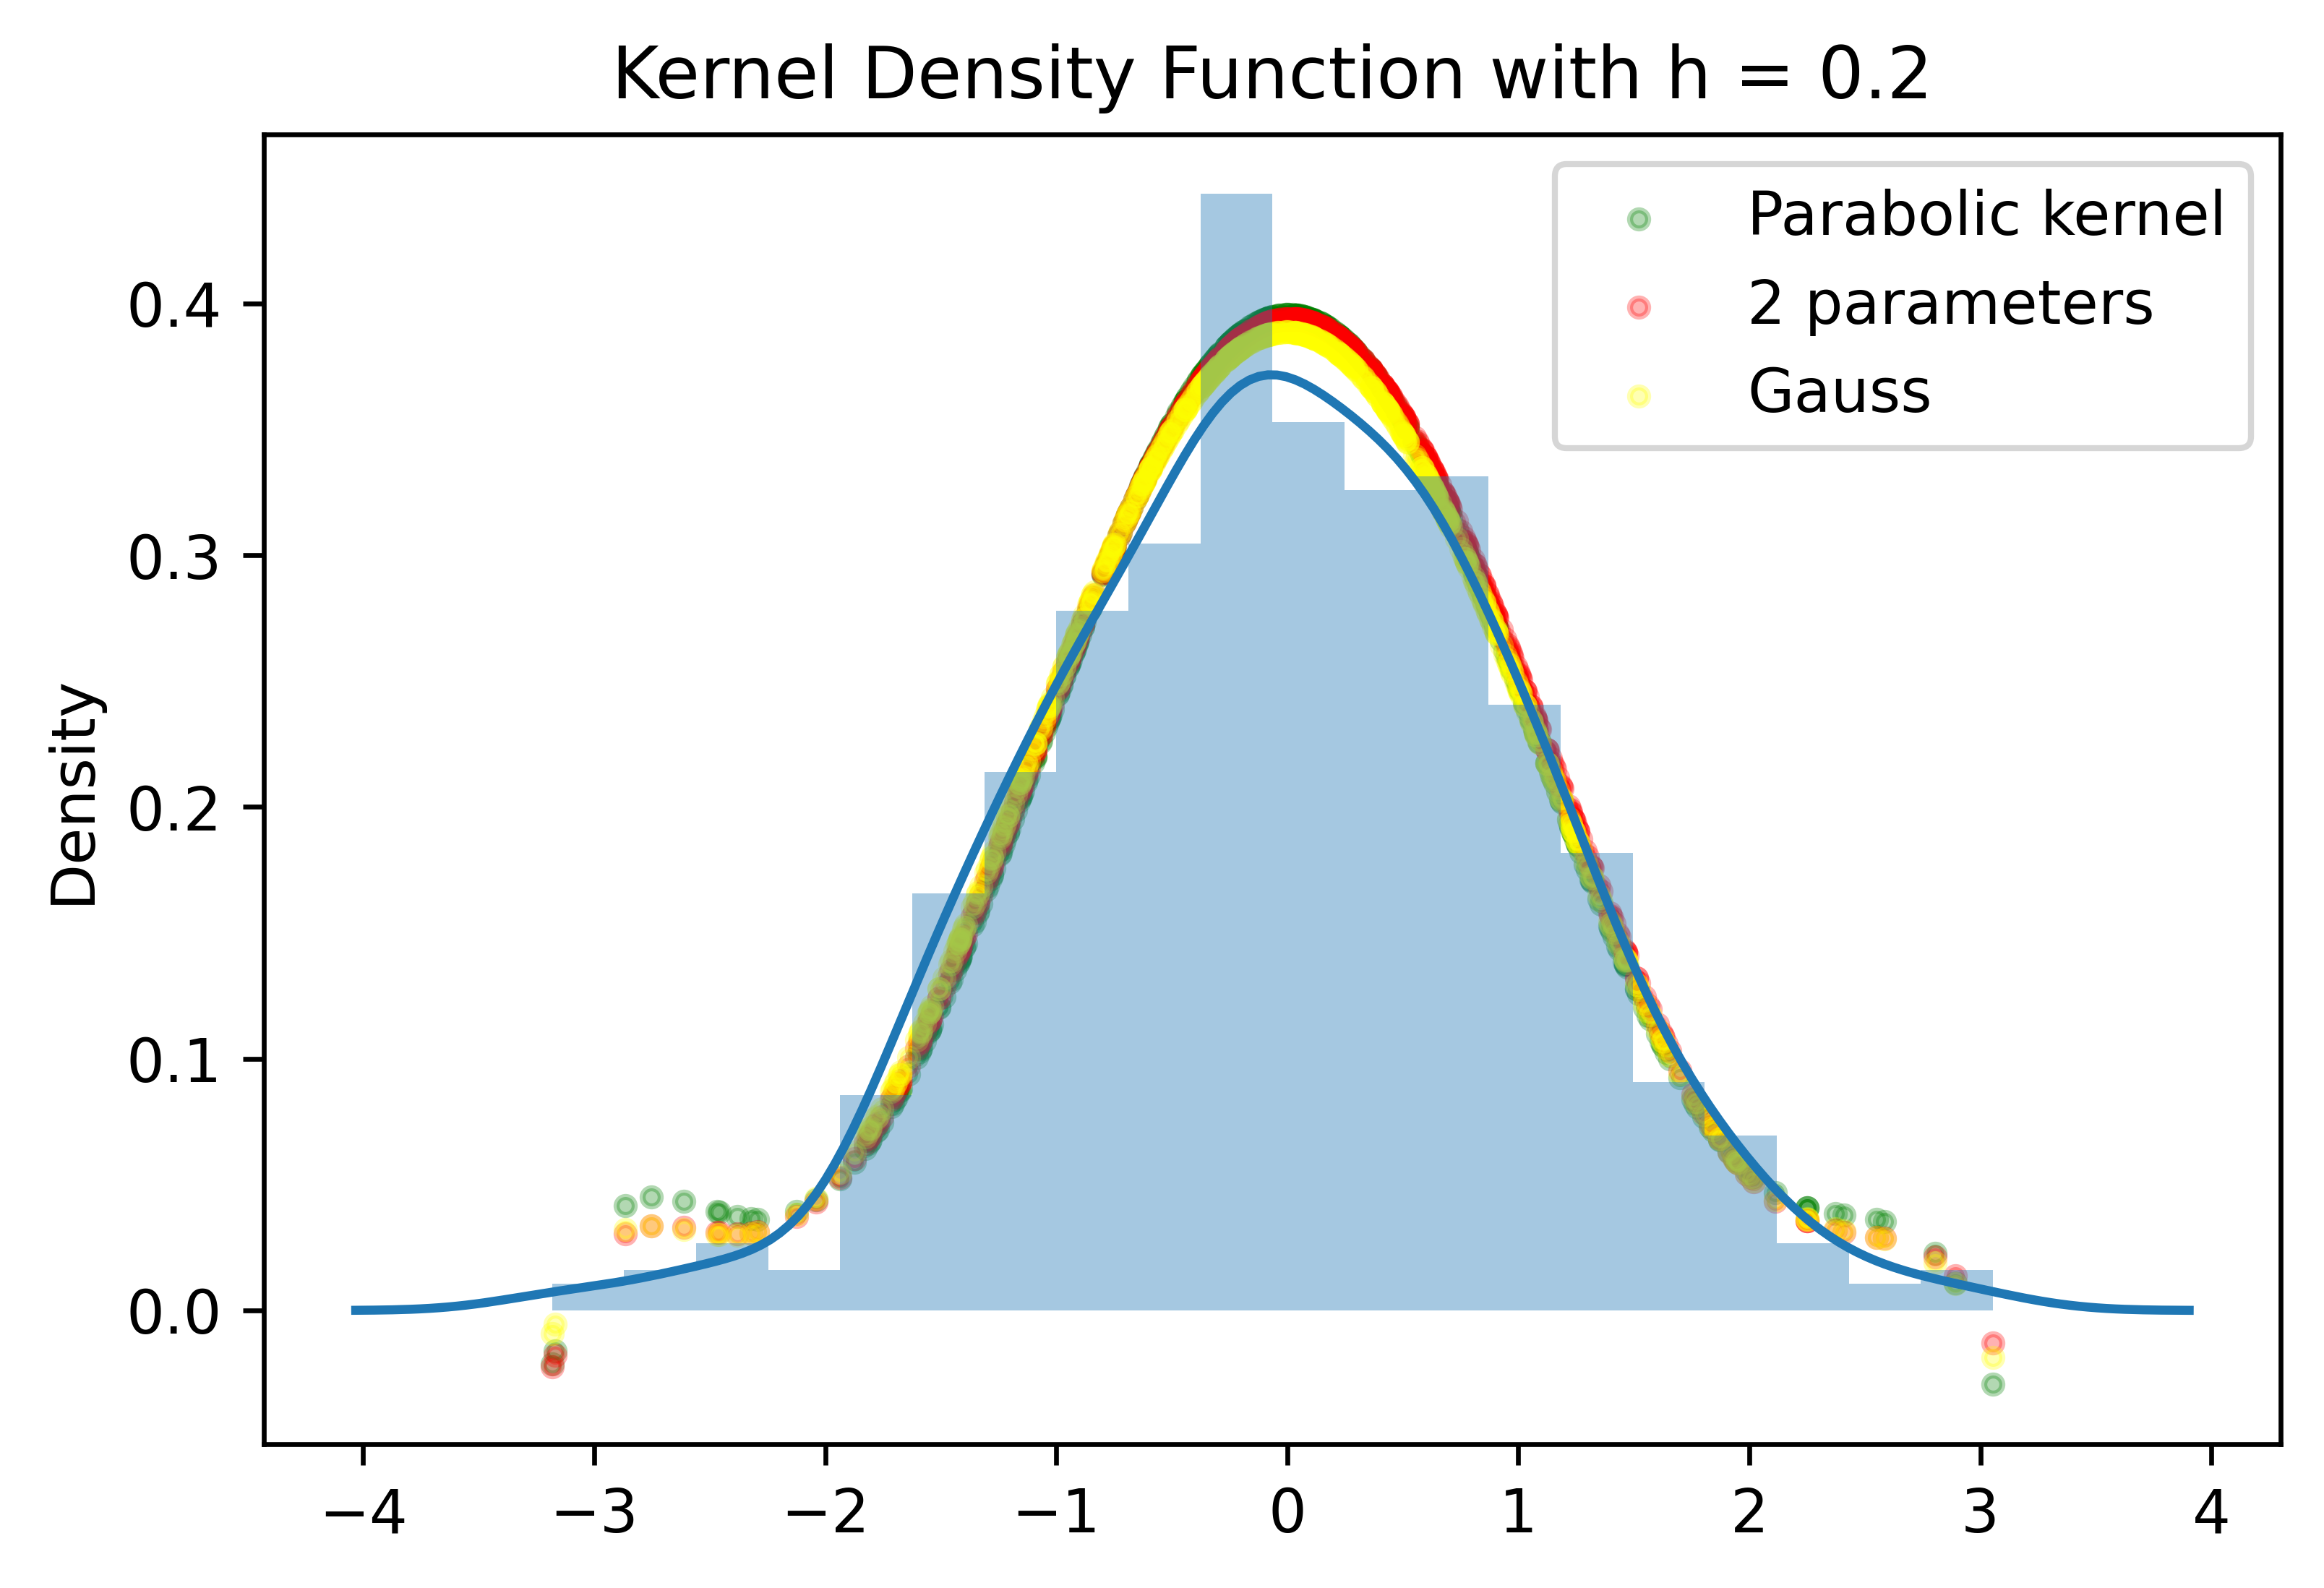

In [9]:
## Keep continue to fk4 5 6 draw the best fit
sns.distplot(Xi)
model4 = np.poly1d(np.polyfit(Xi, fk4, 6))
model5 = np.poly1d(np.polyfit(Xi, fk5, 6))
model6 = np.poly1d(np.polyfit(Xi, fk6, 6))
plt.scatter(Xi, model4(Xi), color='green', alpha = 0.3, label='Parabolic kernel', marker='.')
plt.scatter(Xi, model5(Xi), color='red', alpha = 0.3, label='2 parameters', marker='.')
plt.scatter(Xi, model6(Xi), color='yellow', alpha = 0.3, label='Gauss', marker='.')
plt.legend()
plt.title('Kernel Density Function with h = 0.2')

In [10]:
X_uniform = np.linspace(start=-3, stop=3, num=n_size)
X_uniform[:3]

array([-3.        , -2.98998331, -2.97996661])

In [11]:
fk1u = f_kernel(xi =X_uniform, h0=1, kernel=1, n_size=600)
fk2u = f_kernel(xi =X_uniform, h0=2, kernel=1, n_size=600)
fk3u = f_kernel(xi =X_uniform, h0=3, kernel=1, n_size=600)
fk4u = f_kernel(xi =X_uniform, h0=1.5, kernel=3, n_size=600)
fk5u = f_kernel(xi =X_uniform, h0=2.5, kernel=4, n_size=600)
fk6u = f_kernel(xi =X_uniform, h0=3, kernel=5, n_size=600)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box Kernel Density Function in Uniform distribution')

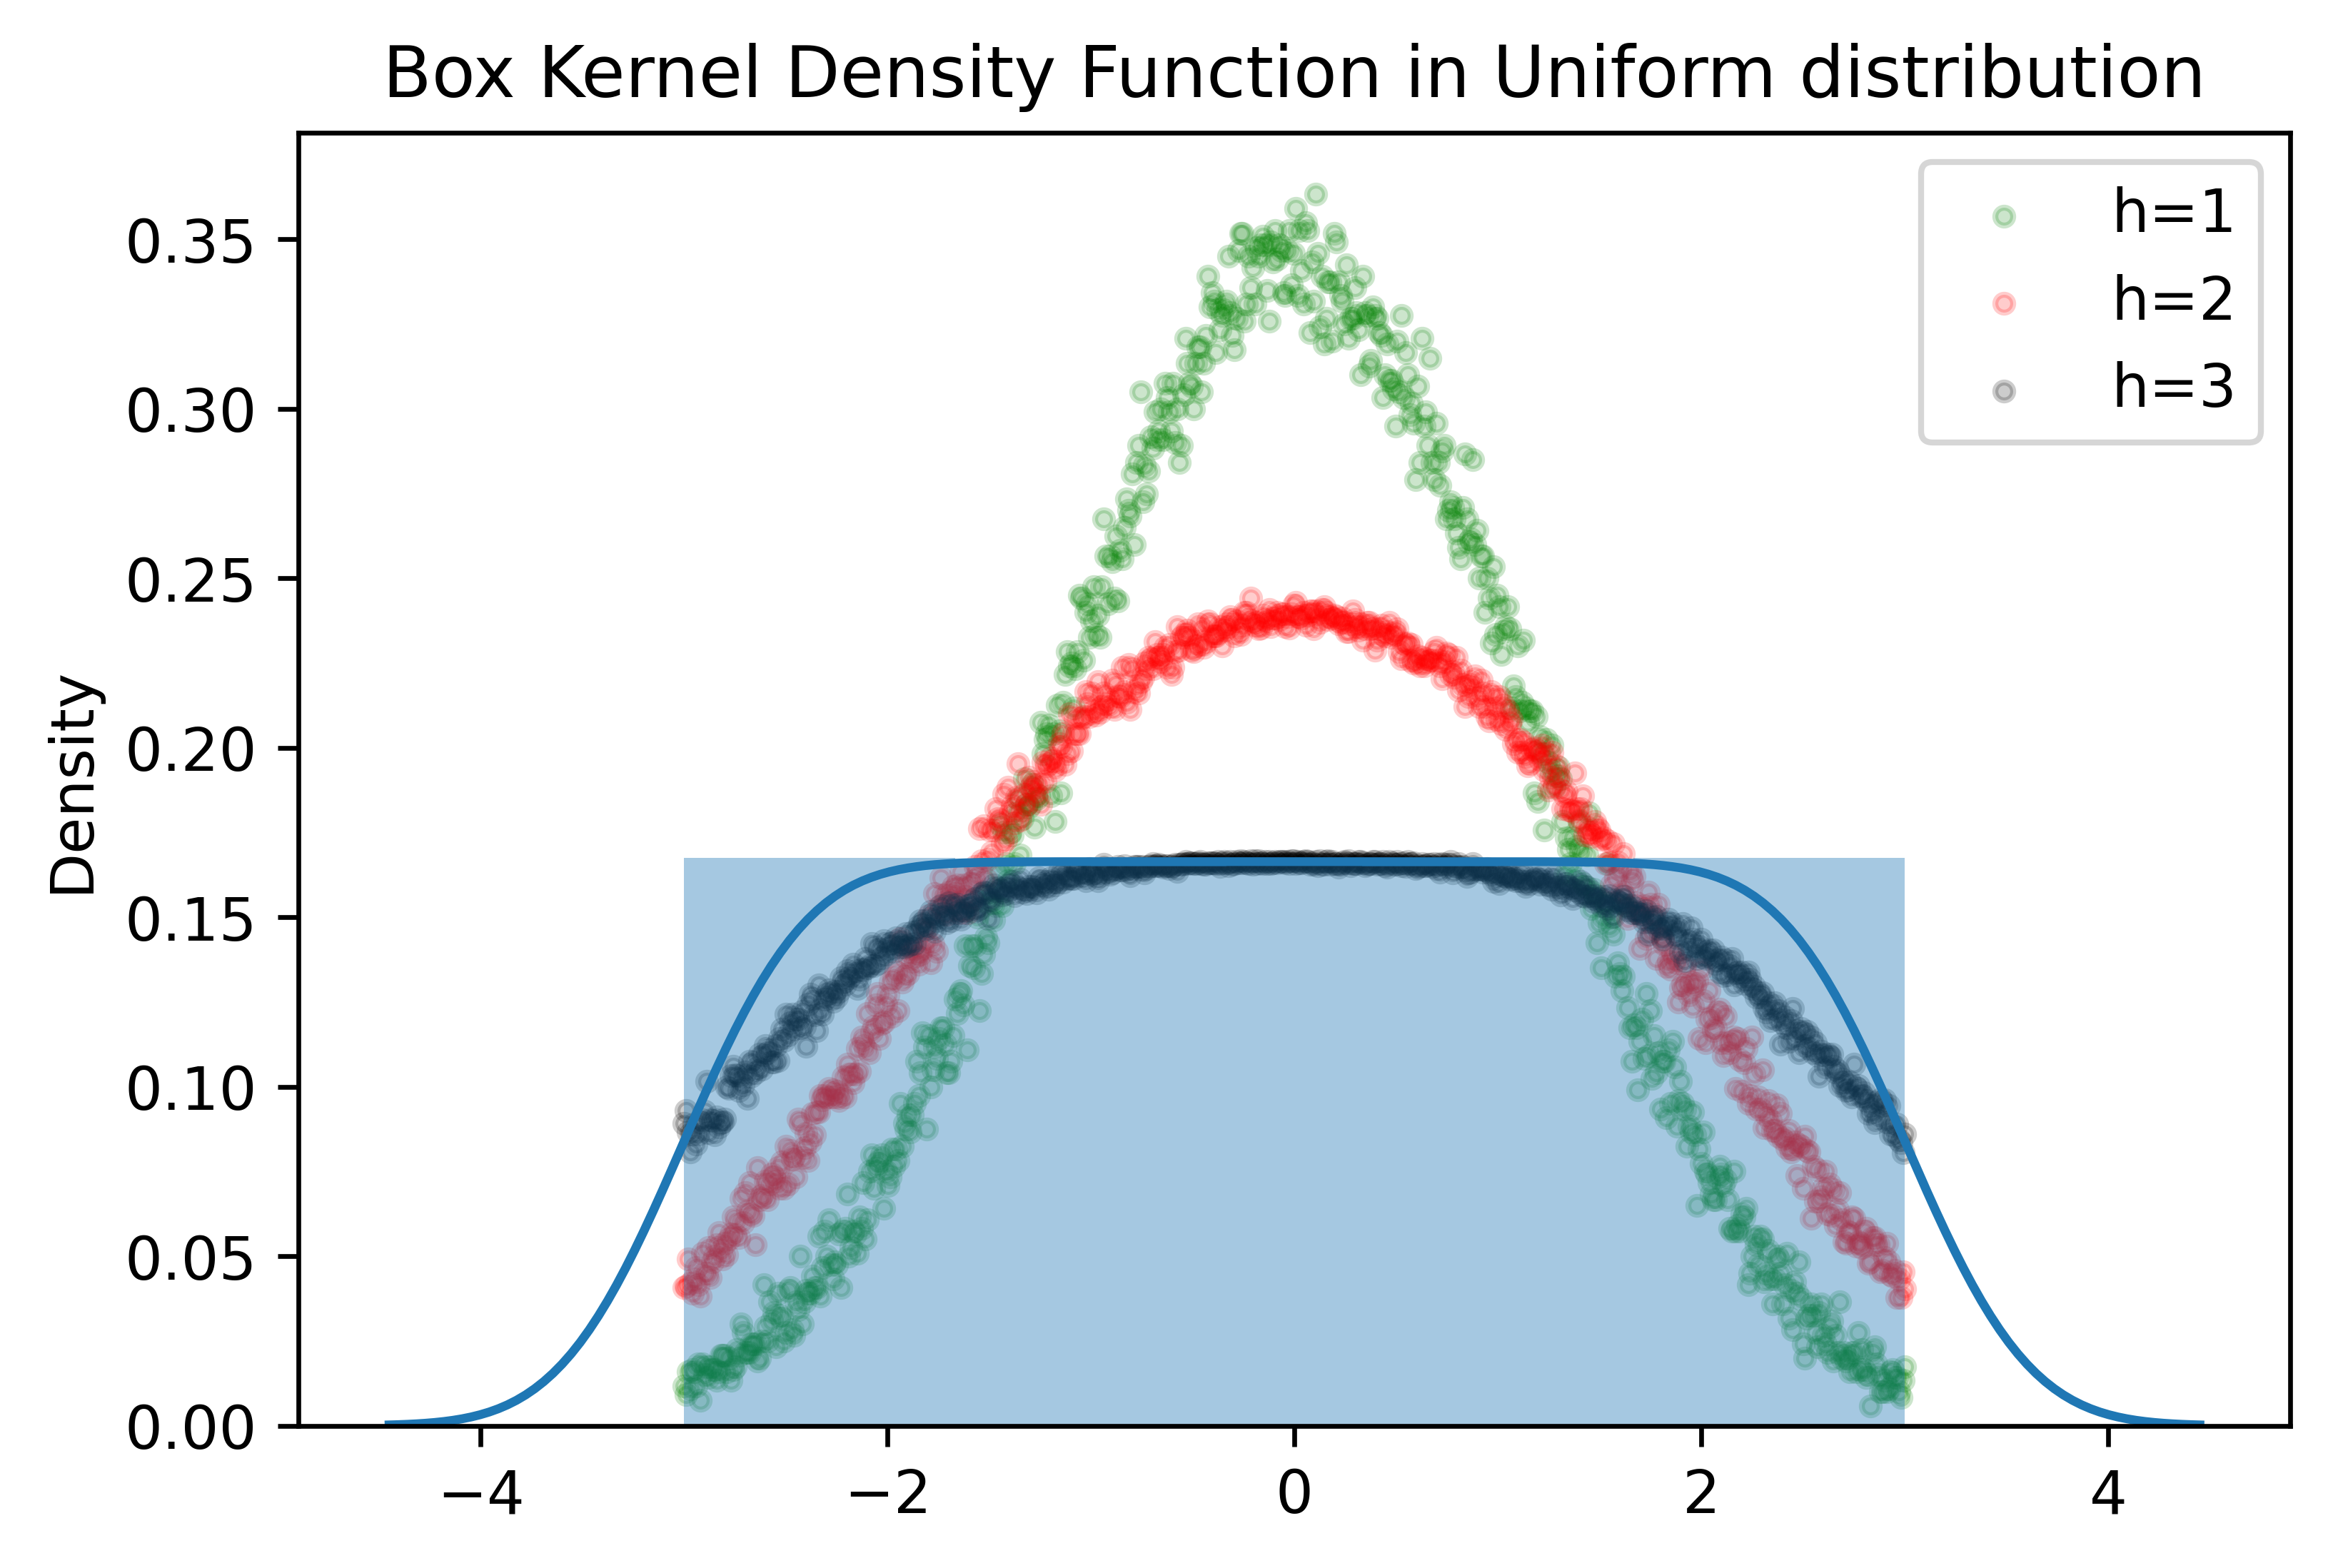

In [12]:
plt.rcParams["figure.dpi"] = 600
sns.distplot(X_uniform)
plt.scatter(X_uniform, fk1u, label="h=1", color = 'green', alpha = 0.2, marker = '.')
plt.scatter(X_uniform, fk2u, label="h=2", color = 'red', alpha = 0.2, marker = '.')
plt.scatter(X_uniform, fk3u, label="h=3", color = 'black', alpha = 0.2, marker = '.')
plt.legend()
plt.title('Box Kernel Density Function in Uniform distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Kernel Density Function in Uniform Distribution')

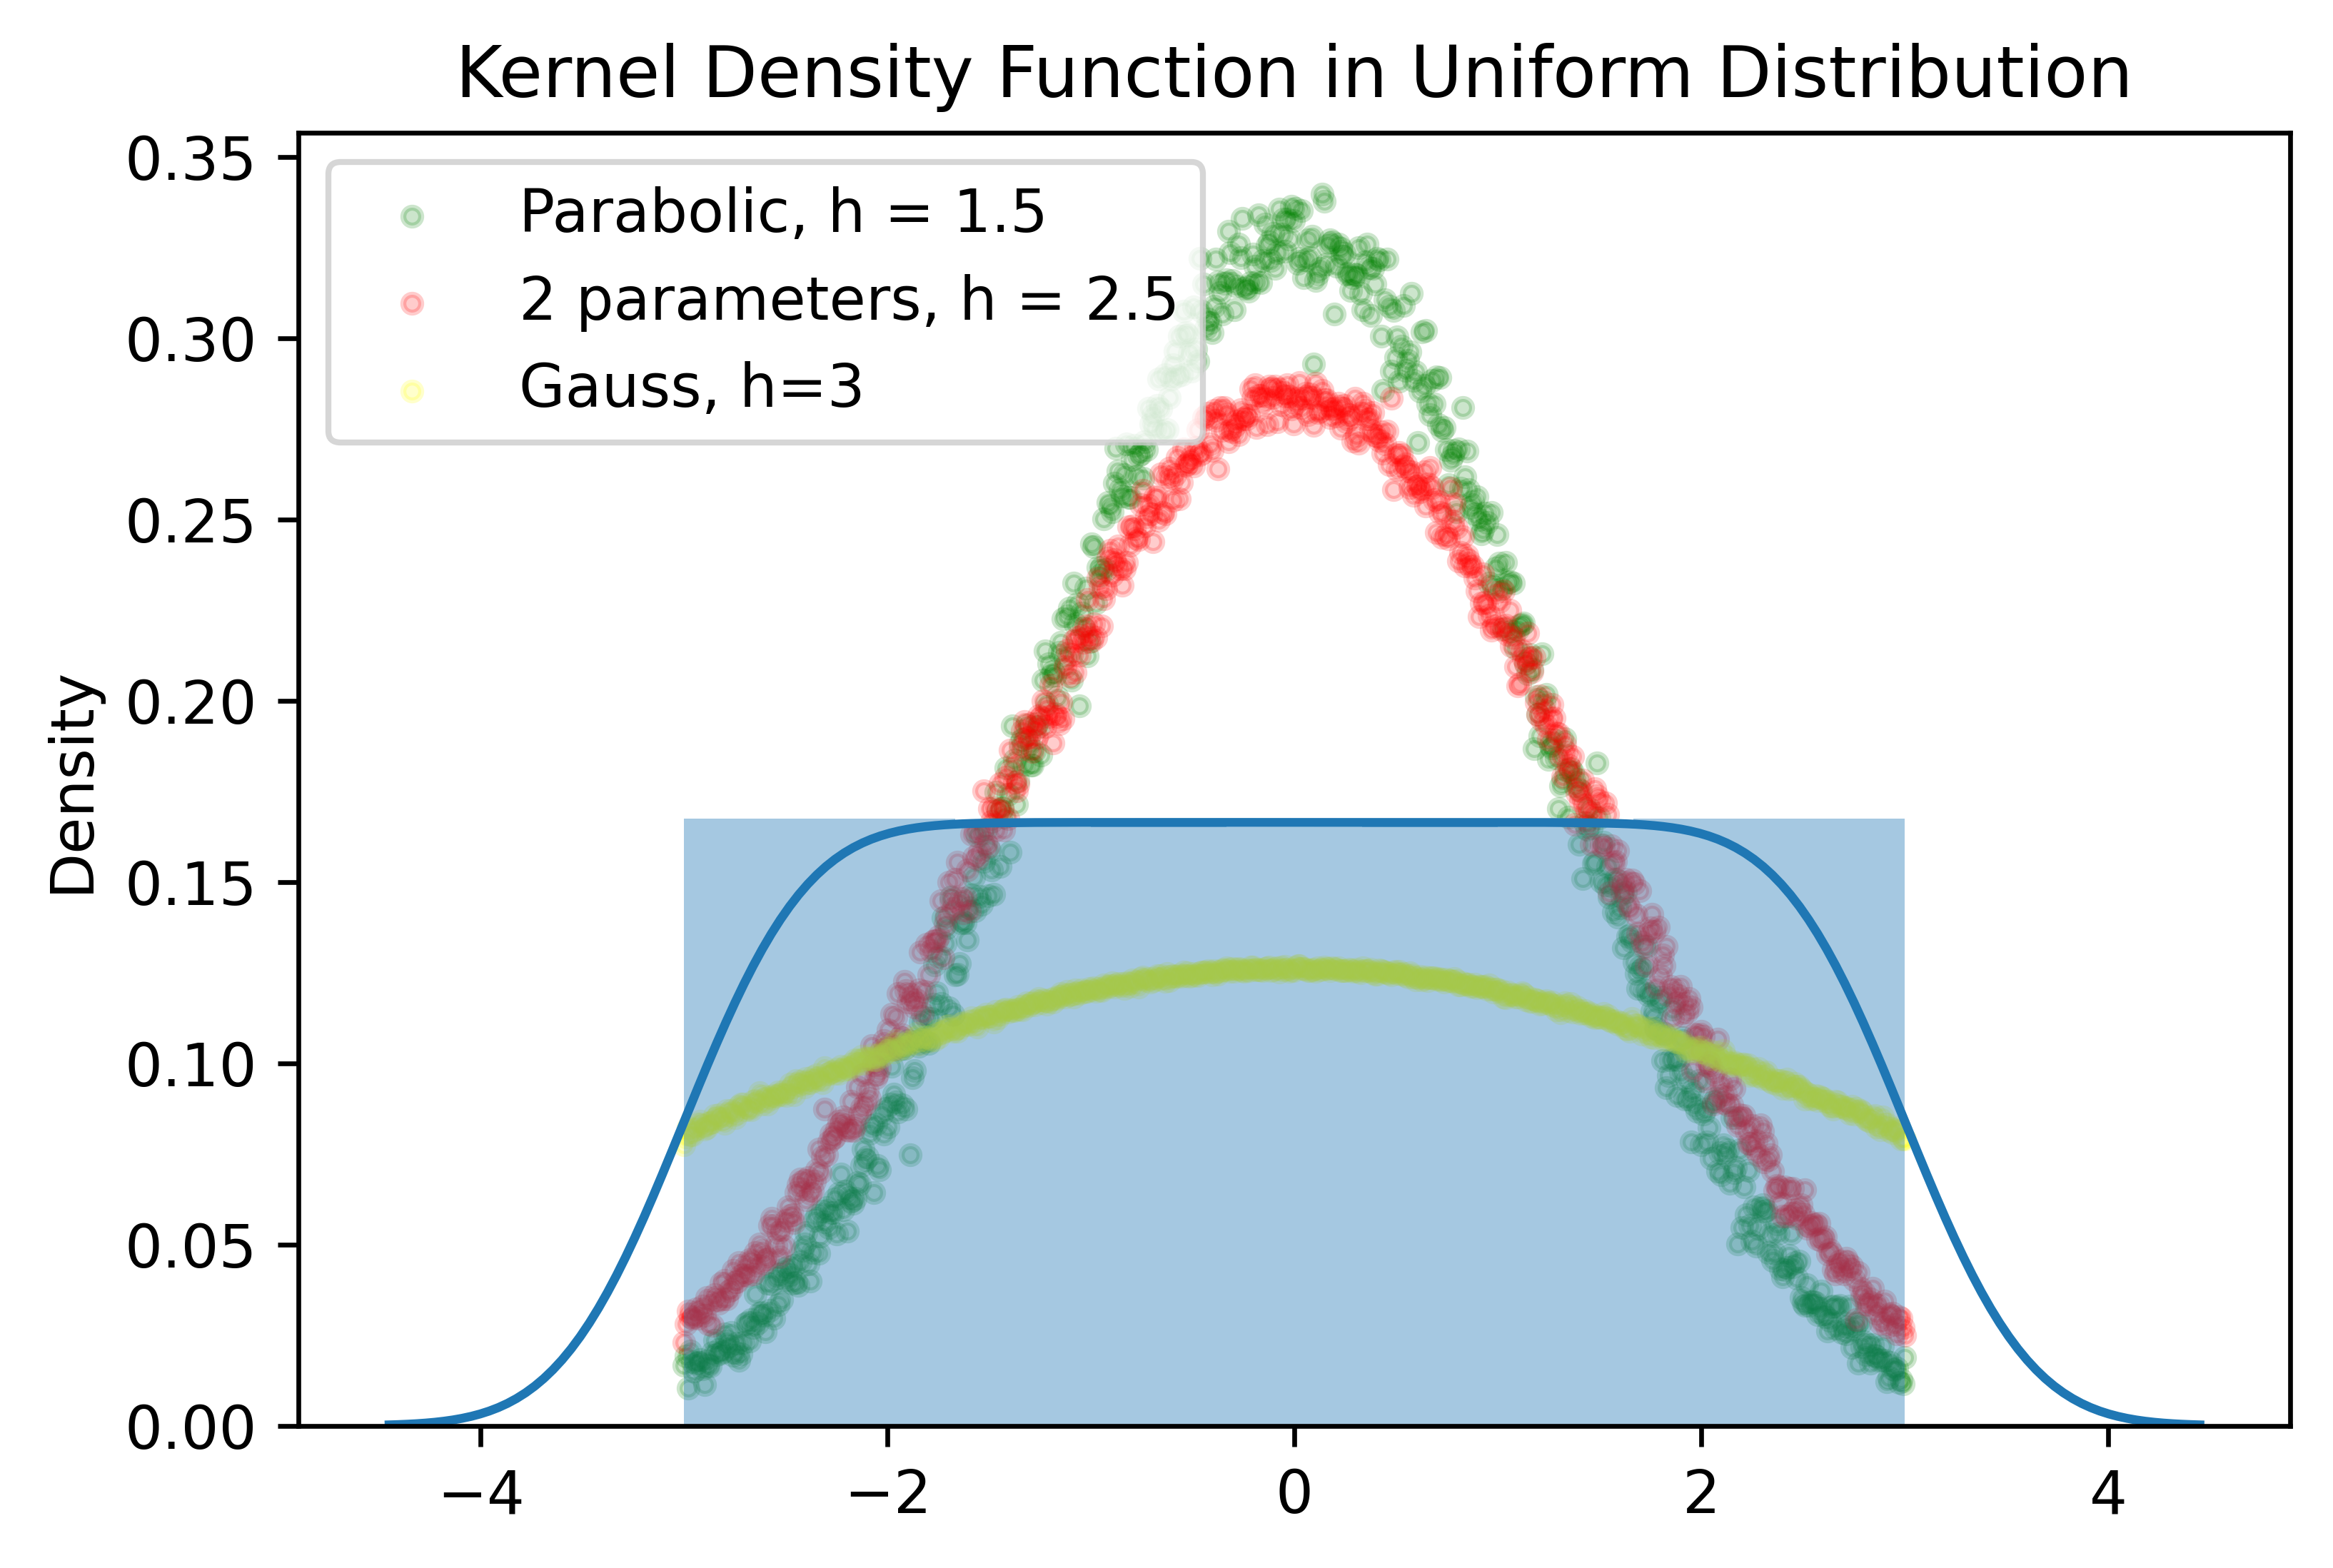

In [13]:
plt.rcParams["figure.dpi"] = 600
sns.distplot(X_uniform)
plt.scatter(X_uniform, fk4u, label="Parabolic, h = 1.5", color = 'green', alpha = 0.2, marker = '.')
plt.scatter(X_uniform, fk5u, label="2 parameters, h = 2.5", color = 'red', alpha = 0.2, marker = '.')
plt.scatter(X_uniform, fk6u, label="Gauss, h=3", color = 'yellow', alpha = 0.2, marker = '.')
plt.legend()
plt.title('Kernel Density Function in Uniform Distribution')

Choosing h Bandwidth.

Scott’s rule of thumb ([Scott1992]): $h \approx {\left( {\frac{4}{3}} \right)^{1/5}}\widehat \sigma {n^{ - 1/5}}$

Silverman’s rule of thumb ([Silverman1986]): $h = 0.9 \cdot \min \left( {\widehat \sigma ,IQR/1.35} \right){n^{ - 1/5}}$
###
But if we don’t know the actual distribution of our data and want to build a density estimation to explore the distribution form. We should use:
Sheather and Jones method ([Sheather1991])

In [14]:
## Scott's rule of thumb
def Scott_bandwidth(x):
  n_size = len(x)
  h0 = (4/3)**0.2 * np.std(x)* n_size**(-1/5)
  return h0
## Silverman's ruld of thumb
def Silverman_bandwidth(x):
  n_size = len(x)
  IQR = np.quantile(x, .75) - np.quantile(x, .25)
  h0 = 0.9 * np.minimum(np.std(x), IQR/1.35)* n_size**(-1/5)
  return h0

h1Scott = Scott_bandwidth(Xi)
h2Scott = Scott_bandwidth(X_uniform)
h1Silver= Silverman_bandwidth(Xi)
h2Silver= Silverman_bandwidth(X_uniform)
print(h1Scott, h1Silver)
print(h2Scott, h2Silver)

0.2996987321164743 0.2546476471278718
0.5112601574196768 0.4344068966783242


In [15]:
fk1 = f_kernel(xi =Xi, h0=h1Silver, kernel=1, n_size=600)
fk2 = f_kernel(xi =Xi, h0=h1Silver, kernel=2, n_size=600)
fk3 = f_kernel(xi =Xi, h0=h1Silver, kernel=3, n_size=600)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Kernel Density Function with Triangle kernel and Silverman rule')

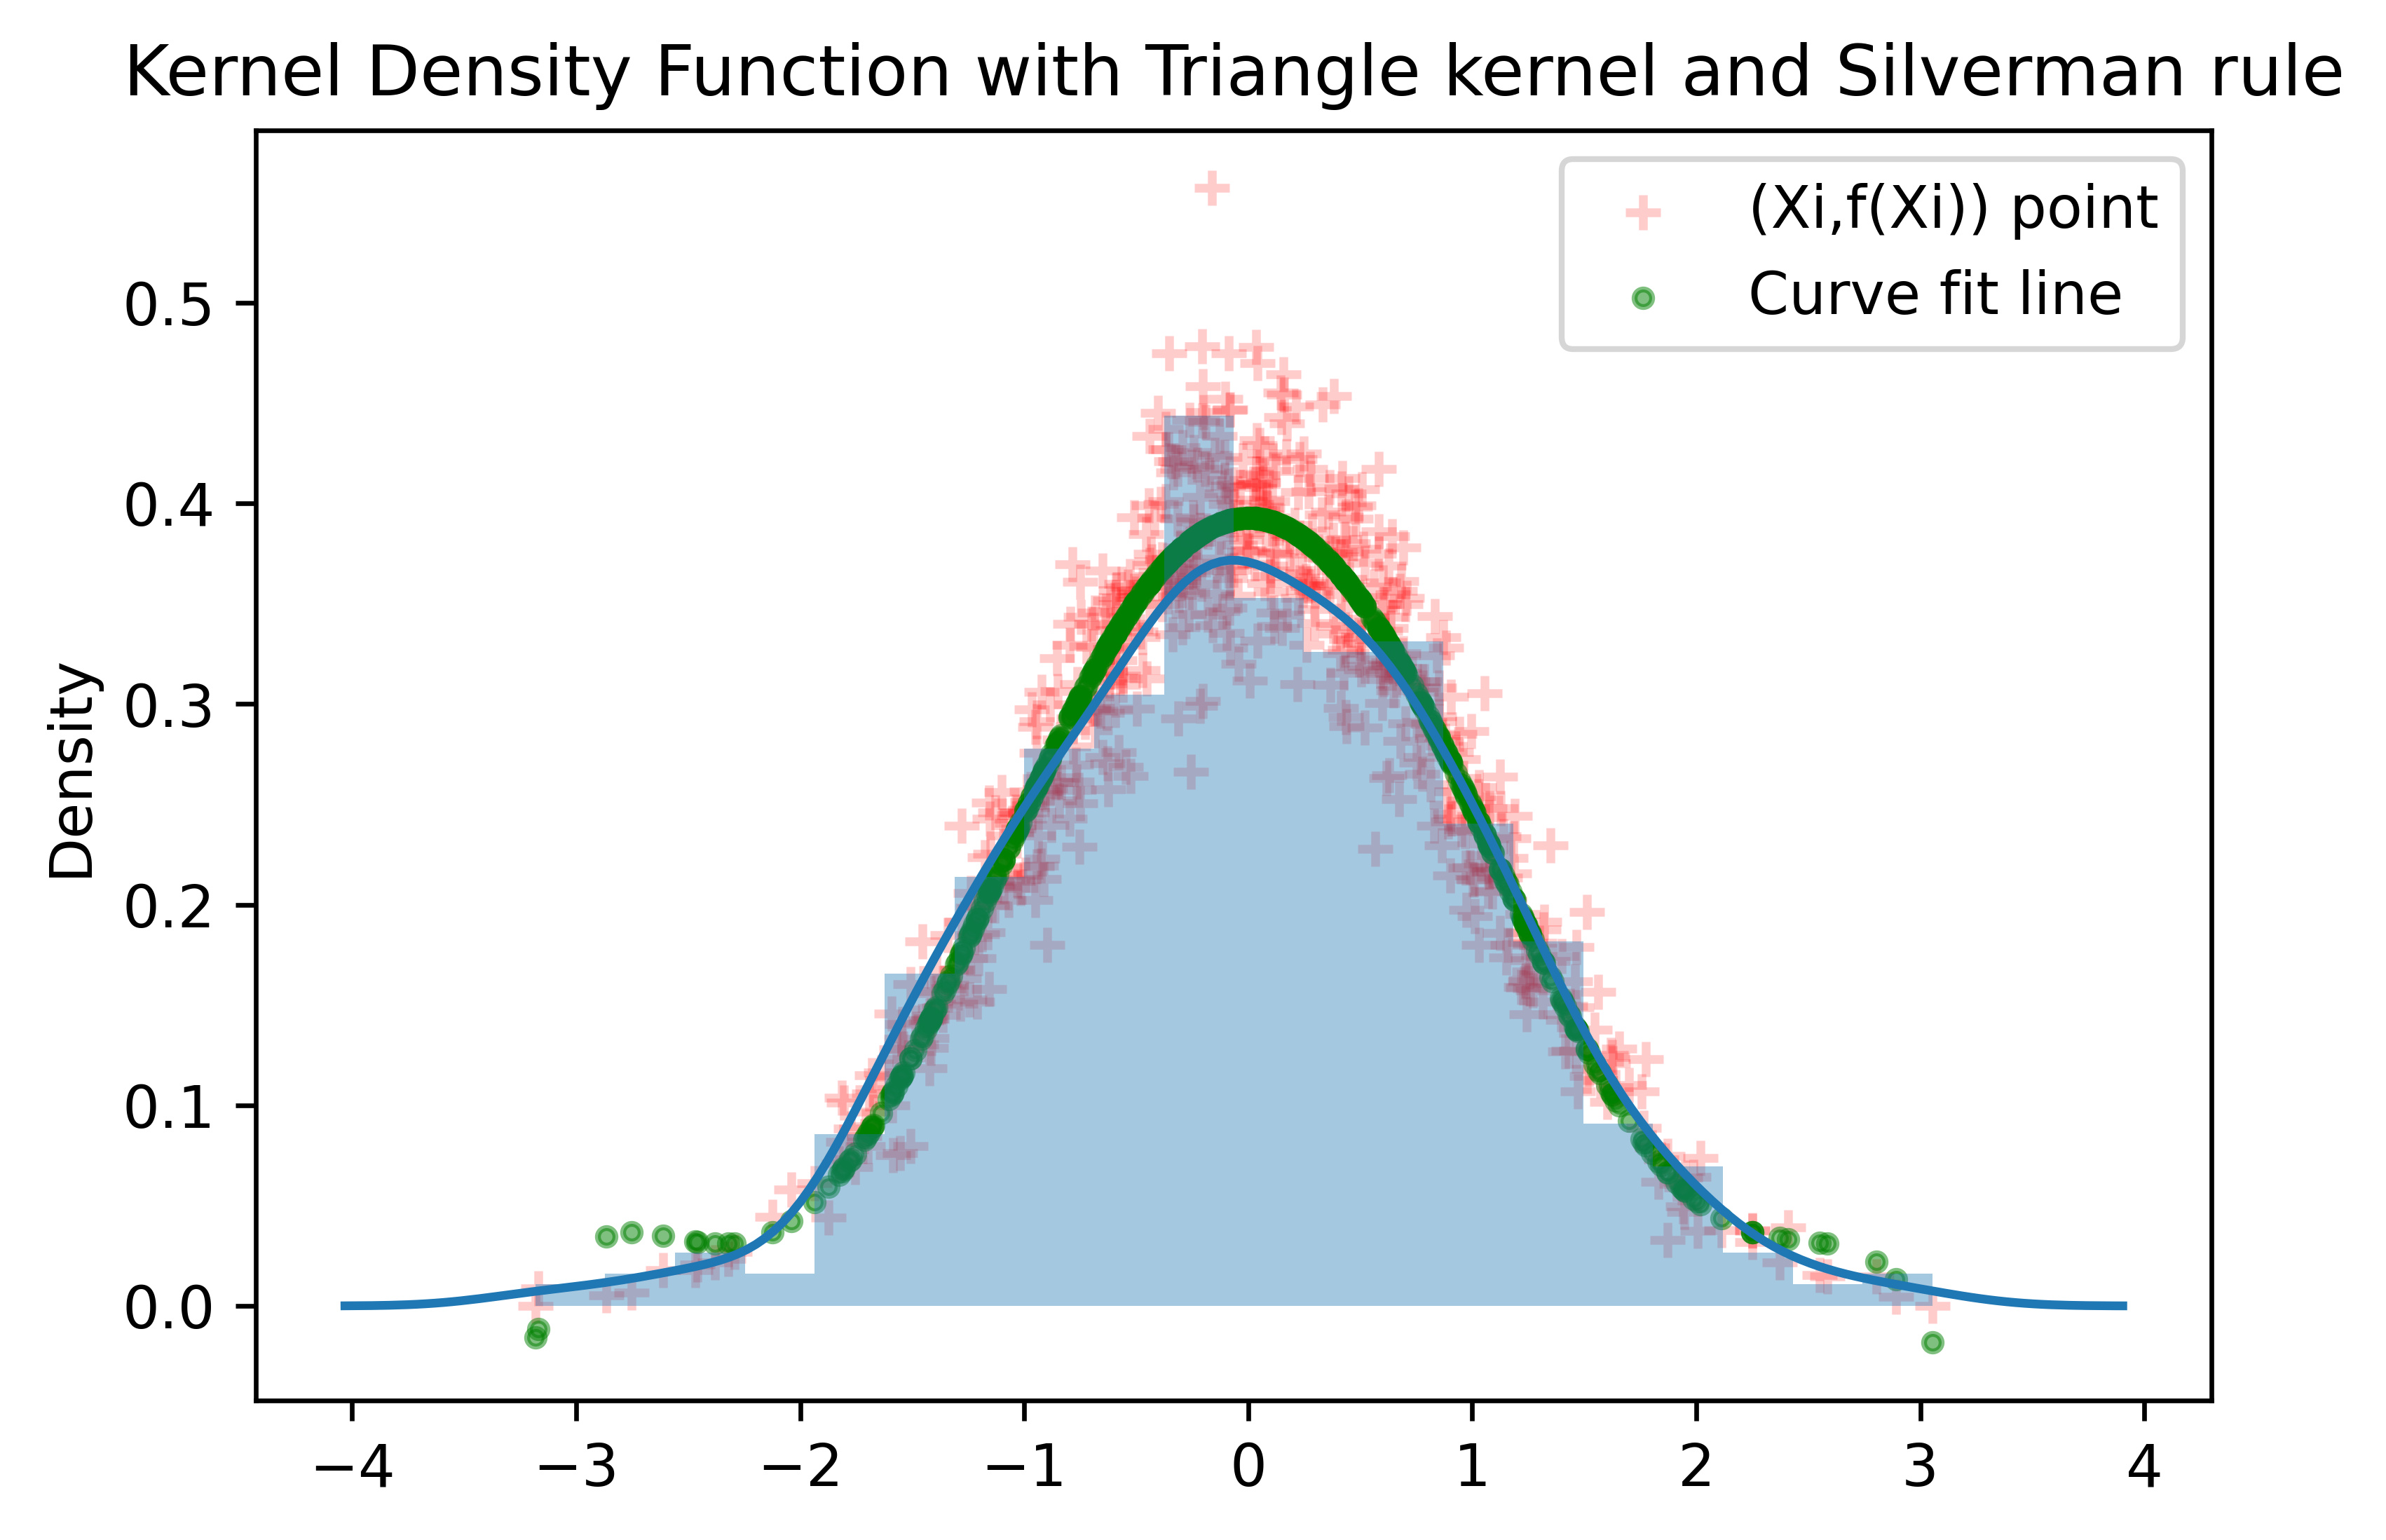

In [16]:
sns.distplot(Xi)
plt.scatter(Xi, fk2, label="(Xi,f(Xi)) point", color = 'red', alpha = 0.2, marker = '+')
model = np.poly1d(np.polyfit(Xi, fk2, 6))
plt.scatter(Xi, model(Xi), color='green', alpha = 0.5, label='Curve fit line', marker='.')
plt.legend()
plt.title('Kernel Density Function with Triangle kernel and Silverman rule')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compare Box, Triangle, Parabolic with KDE bandwidth by Silverman rule')

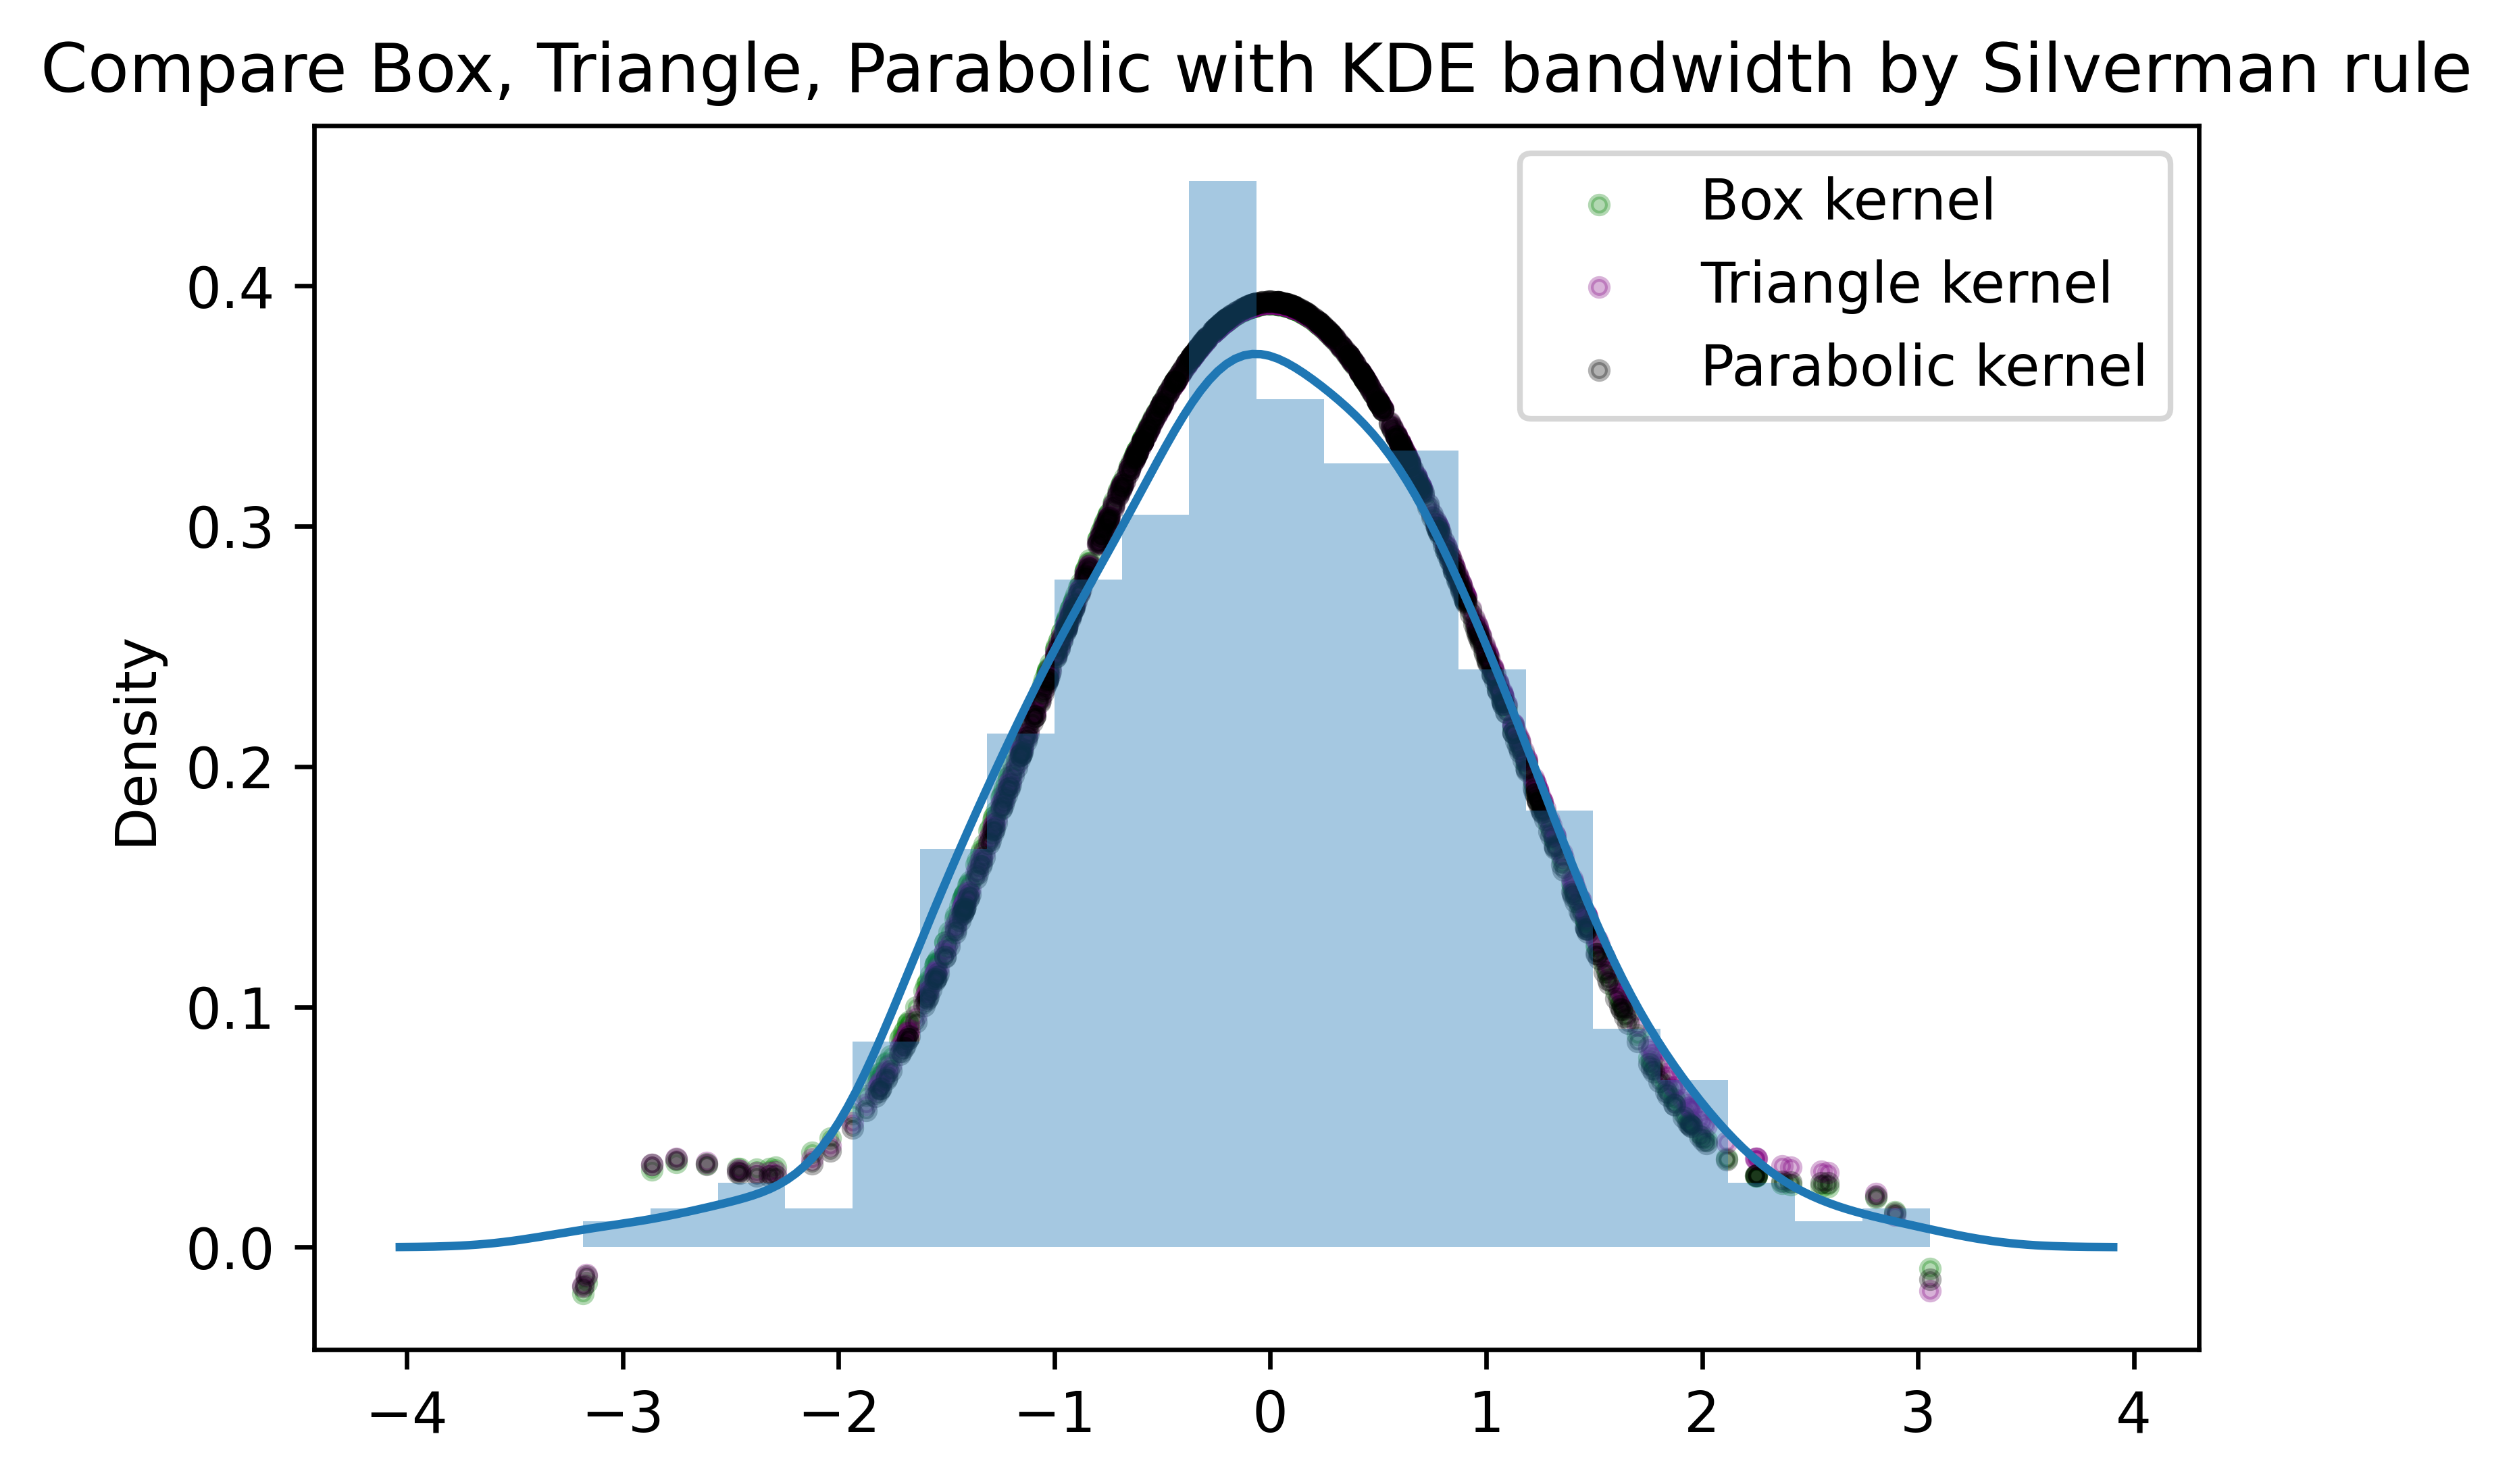

In [17]:
sns.distplot(Xi)
model1 = np.poly1d(np.polyfit(Xi, fk1, 6))
model2 = np.poly1d(np.polyfit(Xi, fk2, 6))
model3 = np.poly1d(np.polyfit(Xi, fk3, 6))
plt.scatter(Xi, model1(Xi), color='green', alpha = 0.3, label='Box kernel', marker='.')
plt.scatter(Xi, model2(Xi), color='purple', alpha = 0.3, label='Triangle kernel', marker='.')
plt.scatter(Xi, model3(Xi), color='black', alpha = 0.3, label='Parabolic kernel', marker='.')
plt.legend()
plt.title('Compare Box, Triangle, Parabolic with KDE bandwidth by Silverman rule')

In [18]:
fk4 = f_kernel(xi =X_uniform, h0=h2Scott, kernel=4, n_size=600)
fk5 = f_kernel(xi =X_uniform, h0=h2Scott, kernel=5, n_size=600)
fk6 = f_kernel(xi =X_uniform, h0=h2Scott, kernel=6, n_size=600)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compare Box, Triangle, Parabolic with KDE bandwidth by Scott rule')

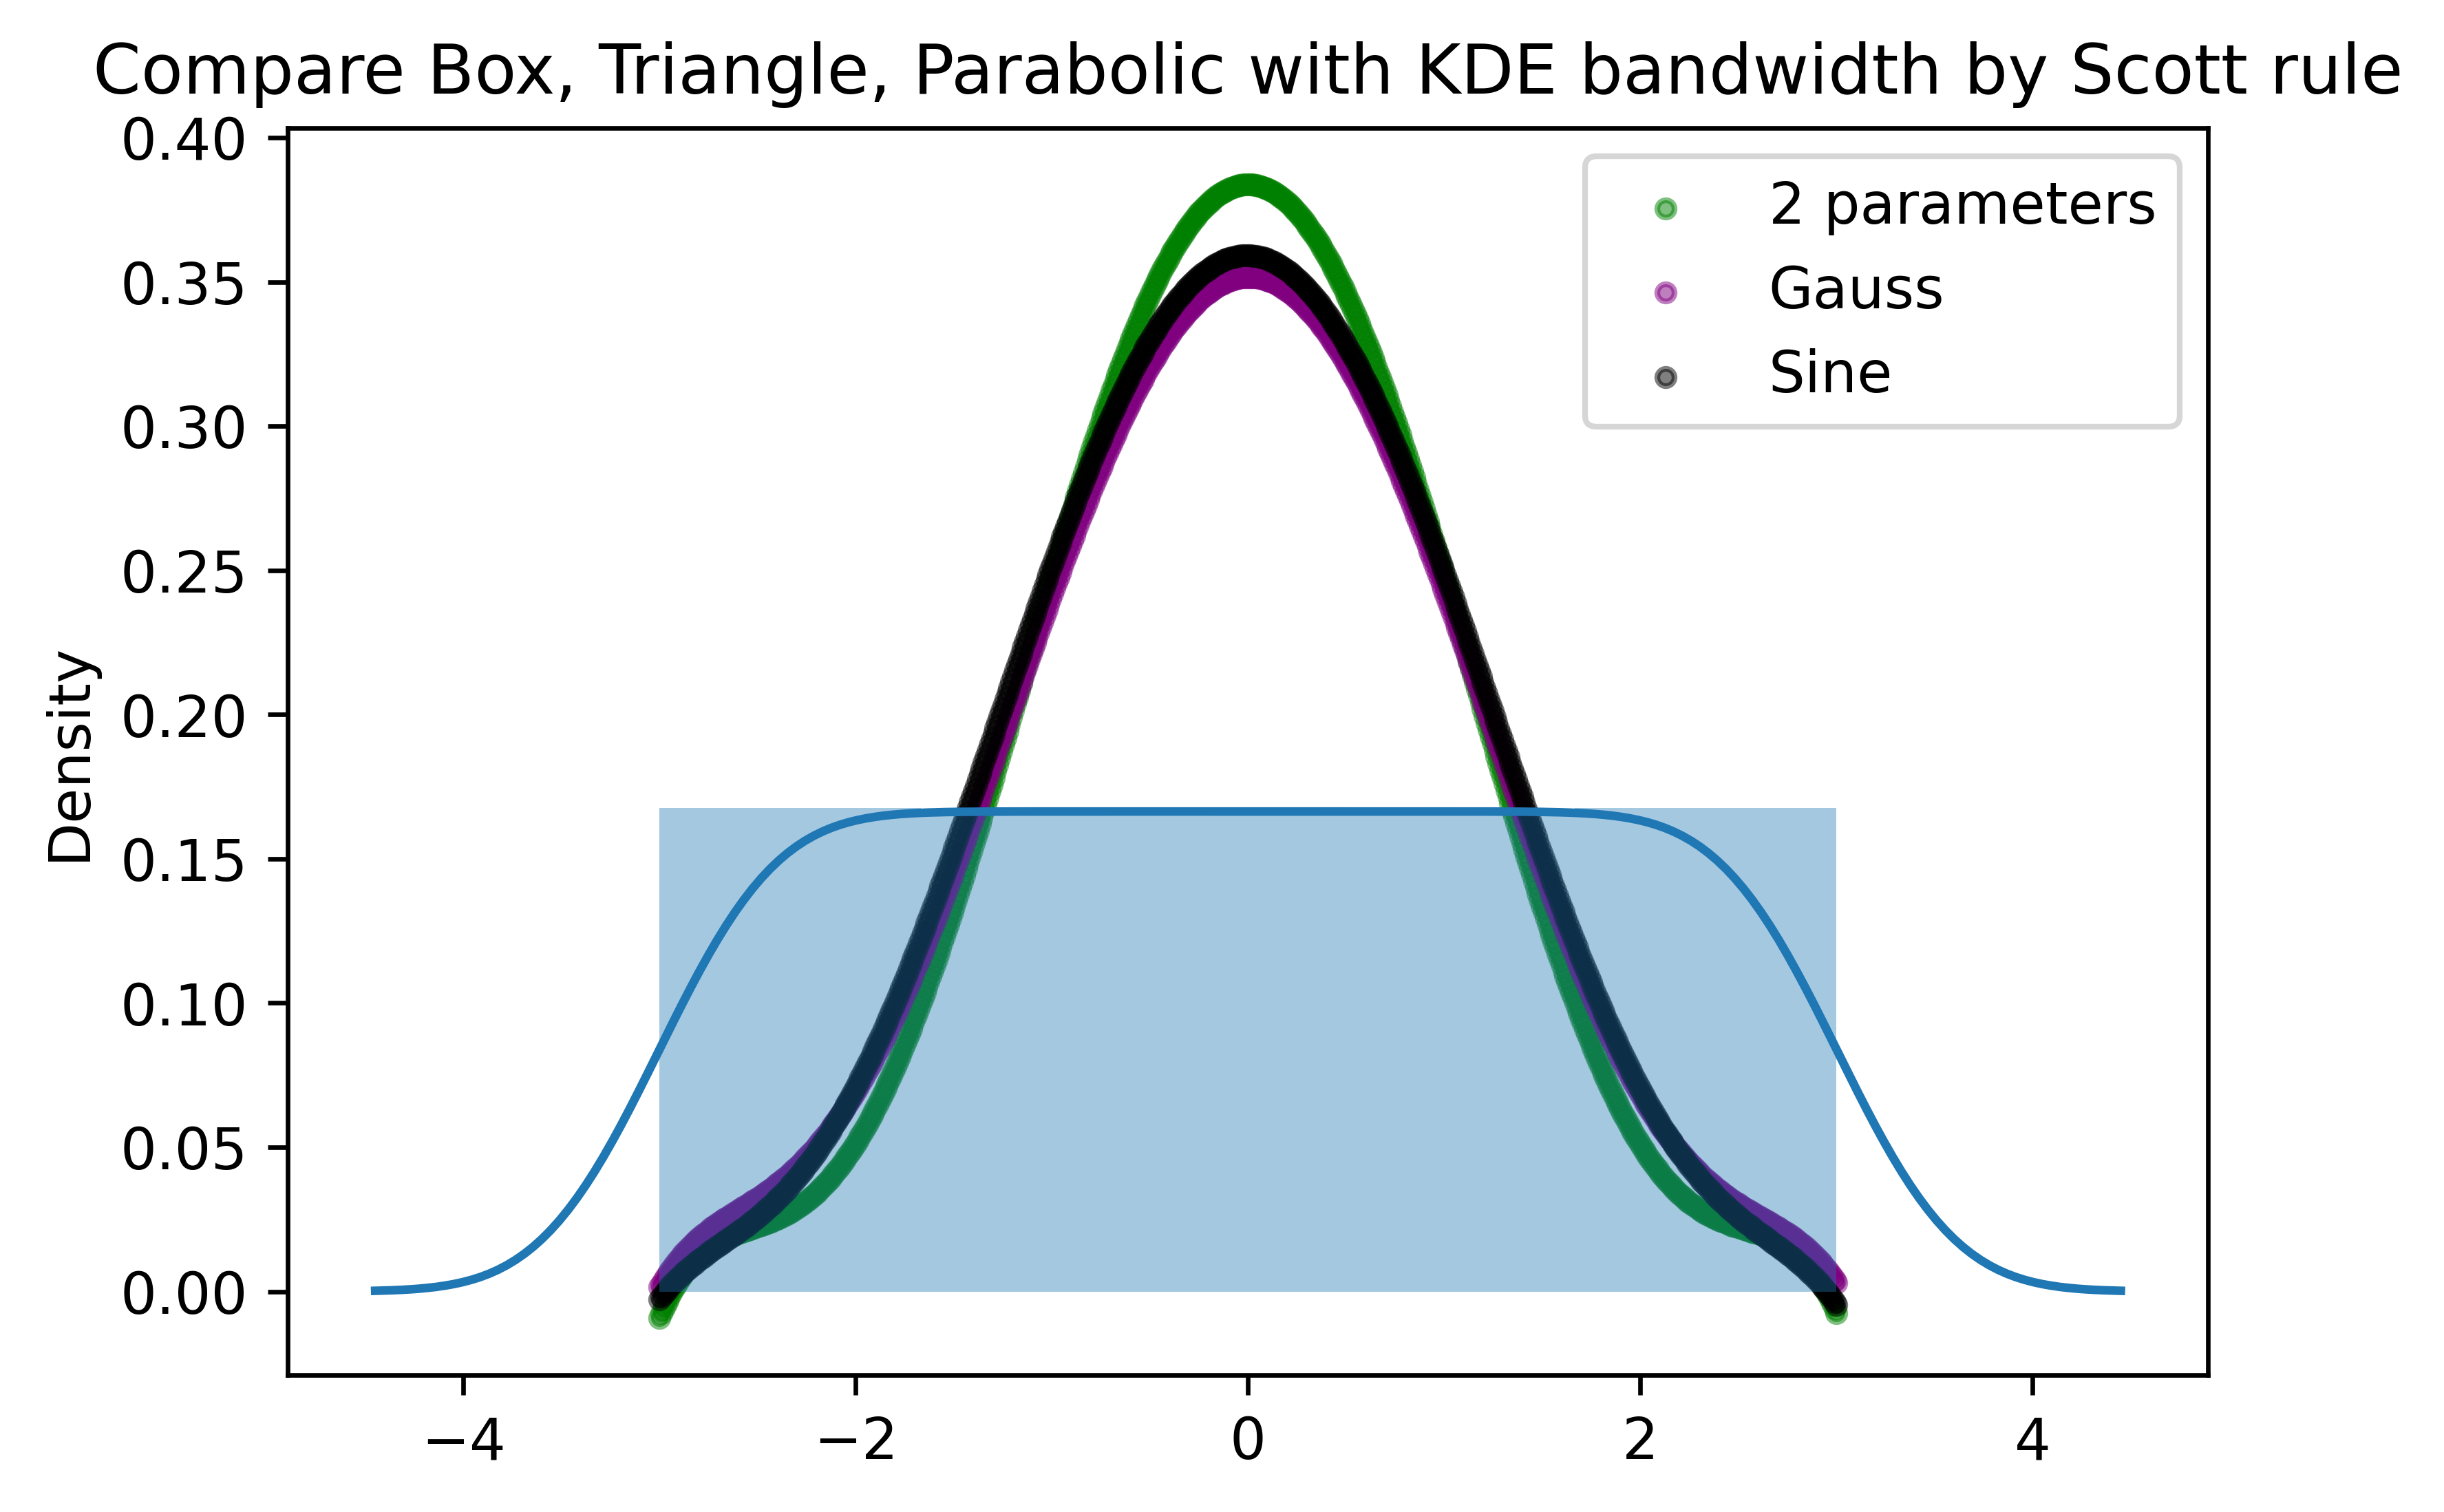

In [19]:
sns.distplot(X_uniform)
model4 = np.poly1d(np.polyfit(X_uniform, fk4, 6))
model5 = np.poly1d(np.polyfit(X_uniform, fk5, 6))
model6 = np.poly1d(np.polyfit(X_uniform, fk6, 6))
plt.scatter(X_uniform, model4(X_uniform), color='green', alpha = 0.5, label='2 parameters', marker='.')
plt.scatter(X_uniform, model5(X_uniform), color='purple', alpha = 0.5, label='Gauss', marker='.')
plt.scatter(X_uniform, model6(X_uniform), color='black', alpha = 0.5, label='Sine', marker='.')
plt.legend()
plt.title('Compare Box, Triangle, Parabolic with KDE bandwidth by Scott rule')